# Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = {
     "Study_Hours": [1,2,3,4,5],
    "Marks": [10,25,55,90,130]
}

In [3]:
df = pd.DataFrame(data)
df

,Study_Hours,Marks
0,1,10
1,2,25
2,3,55
3,4,90
4,5,130


In [4]:
x=df[["Study_Hours"]]
y=df["Marks"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
x_train

,Study_Hours
2,3
0,1
3,4


In [7]:
y_train

2    55
0    10
3    90
Name: Marks, dtype: int64

In [8]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [9]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [10]:
y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

In [11]:
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Testing MSE:", mean_squared_error(y_test, y_test_pred))

Training MSE: 2.3560645702600887e-28
Testing MSE: 11.111111111110914


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


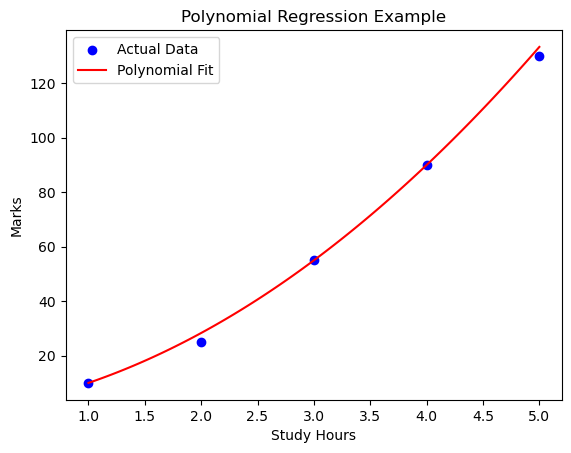

In [12]:
plt.scatter(x,y, color='blue', label='Actual Data')
x_line = np.linspace(min(x['Study_Hours']), max(x['Study_Hours']), 100).reshape(-1, 1)
y_line = model.predict(poly.transform(x_line))
plt.plot(x_line, y_line, color='red', label='Polynomial Fit')
plt.xlabel('Study Hours')
plt.ylabel('Marks')
plt.title('Polynomial Regression Example')
plt.legend()
plt.show()

In [13]:
b0 = model.intercept_
b1 = model.coef_[1]
b2 = model.coef_[2]

print("b0 =", b0)
print("b1 =", b1)
print("b2 =", b2)

b0 = 1.4210854715202004e-14
b1 = 5.8333333333333455
b2 = 4.166666666666662


In [14]:
x_new = pd.DataFrame({'Study_Hours': [6.0]})
x_new_poly = poly.transform(x_new)
y_new = model.predict(x_new_poly)
print("predicted value:", y_new)

predicted value: [185.]
